**PySDS Week 03 Day 01 v.1 - Exercise - Reddit data collection**

In [14]:
# Exercise 1. The fastest subreddit in the west. 

# For the following subreddits, download the first 200 posts that appear, 
# cleaning out any stickied post (which will ruin this exercise). Then calculate the time
# range between the most recent post and the last post.
# Plot the time differences on a bar graph. 

subreddits = ["pokemon", 
              "muppets", 
              "UNBGBBIIVCHIDCTIICBG", 
              "lego", 
              "TheSimpsons", 
              "relationship_advice",
              "whatswrongwithyourdog",
              "subredditoftheday",
              "aww"
             ]


################################
# Answer Below Here
import json
import praw 
import sys
import pandas as pd 

keys = json.loads(open("keys.json").read())

reddit = praw.Reddit(user_agent='Comment Extraction (by /u/berniehogan)',
                     client_id=keys['client_id'], 
                     client_secret=keys['client_secret'],
                     username=keys['username'], 
                     password=keys['password'])

In [20]:
time_diff_df = pd.DataFrame(index=subreddits,columns=["maxtime","mintime","min_time_post","max_time_post"])

for subname in subreddits:

    max_time = 0
    min_time = sys.maxsize
    min_time_post = None
    max_time_post = None
    sub = reddit.subreddit(subname)
    posts = sub.top(limit=25)
    for post in posts: 
        if (post.created_utc < min_time) & (post.stickied == False):
            min_time = post.created_utc
            min_time_post = post.id
        if (post.created_utc > max_time) & (post.stickied == False):
            max_time = post.created_utc
            max_time_post = post.id
            
    time_diff_df.loc[subname,"maxtime"] = max_time
    time_diff_df.loc[subname,"mintime"] = min_time
    time_diff_df.loc[subname,"max_time_post"] = max_time_post
    time_diff_df.loc[subname,"min_time_post"] = min_time_post

    
    print("finished sub %s" % subname)
    
time_diff_df["diff"] = time_diff_df["maxtime"] -  time_diff_df["mintime"]

finished sub pokemon
finished sub muppets
finished sub UNBGBBIIVCHIDCTIICBG
finished sub lego
finished sub TheSimpsons
finished sub relationship_advice
finished sub whatswrongwithyourdog
finished sub subredditoftheday
finished sub aww


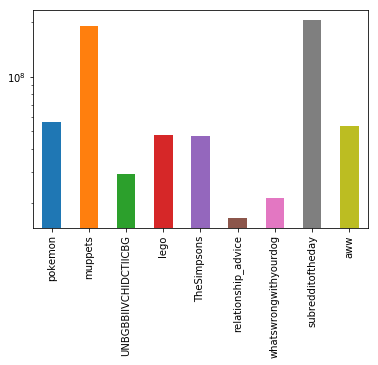

In [21]:
time_diff_df["diff"].plot(kind="bar",logy=True) 

################################
# Peer review comments below here

In [17]:
time_diff_df

,maxtime,mintime,min_time_post,max_time_post,diff
pokemon,1.54032e+09,1.54021e+09,9qdpa0,9qrzy8,107271
muppets,1.54023e+09,1.53783e+09,9ima0n,9qfxe4,2.40268e+06
UNBGBBIIVCHIDCTIICBG,1.54025e+09,1.53659e+09,9engdb,9qjk1r,3.66453e+06
lego,1.54032e+09,1.54021e+09,9qdf2a,9qrrnq,107912
TheSimpsons,1.54032e+09,1.54022e+09,9qecho,9qs39r,103173
relationship_advice,1.54032e+09,1.54026e+09,9qk4hn,9qs8eh,65481
whatswrongwithyourdog,1.54032e+09,1.54023e+09,9qfmtg,9qs3tr,94906
subredditoftheday,1.5403e+09,1.53831e+09,9k5ut8,9qo9w5,1.9872e+06
aww,1.54031e+09,1.54028e+09,9qn3w4,9qqkx0,27211


Populating the interactive namespace from numpy and matplotlib


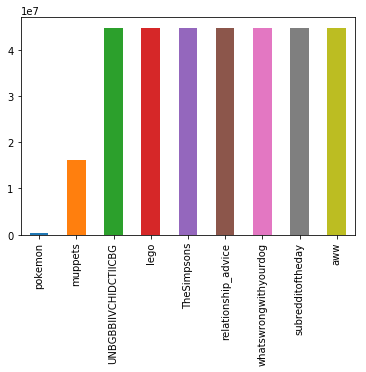

In [8]:
%pylab inline 

time_diff_df["diff"].plot(kind="bar") 


In [ ]:
# Exercise 2.  Testing Gonzalez-Bailon's theories, kinda
# Using my code for how to build a comment tree, select two submissions
# One that is from a political subreddit of any kind (politics / ukpolitics / etc...)
# One that is from a video game or collectible dolls. 
# Both should have roughly the same number of comments (+/- 100)

# Now report the max and the average in-degree at depth = 0 and report the max and average thread depth. 
# This can be done without networkx by grouping the level-1 depth comments and counting the parent
# as in, x[x[depth] = 1], then x.groupby(parent_id).count() -> merge back into orignal data and get average.
# or, yknow, ,use networkx, calculate indegree and merge back in. 
# You don't need to use networkx for the depth, just get the average of the depth, the higher the number the
# the deeper the average comment. 


################################
# Answer Below Here




################################
# Peer review comments below here




